/content
(500, 1200, 3)
(500, 1200)
(500, 1200)
500


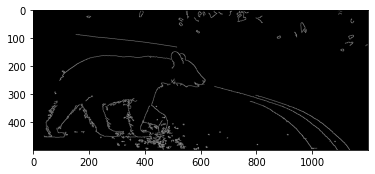

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt #imports matplotlib 
from google.colab.patches import cv2_imshow
import base64
import pickle
!pwd
#if False == os.path.exists('/content/deer.jpg'):
  #!wget "https://drive.google.com/file/d/1DKjX-uWQFn0lQe3yeY53ivumDShDn4JX/view?usp=sharing"  -O "deer.jpg"
  #!wget "https://content.osgnetworks.tv/bowhunter/content/photos/whitetail-buck-standing-on-powerline.jpg"  -O "deer.jpg"
#else:
#  !ls -lart

 
def CannyThreshold(grey,lowThreshold):
    detected_edges = cv2.GaussianBlur(grey,(3,3),0)
    detected_edges = cv2.Canny(detected_edges,lowThreshold,lowThreshold*ratio,apertureSize = kernel_size)
    #dst = cv2.bitwise_and(img,img,mask = detected_edges)  # just add some colours to edges from original image.
    #cv2.imshow('canny demo',dst)
    print(detected_edges.shape)
    #dst = 255 - detected_edges    #black to white     bitwise_not(singleROI,singleROI);
    dst = detected_edges
    plt.imshow(dst, cmap = 'gray')
    cv2.imwrite('bear_edge.jpg', dst, [cv2.IMWRITE_JPEG_QUALITY,0])
    #data = pickle.dumps(detected_edges, pickle.HIGHEST_PROTOCOL)#, data, pickle.HIGHEST_PROTOCOL)
    print(len(dst))
    #base64_bytes = base64.b64encode(detected_edges)
    #print(len(base64_bytes))
    #base64_string = base64_bytes.decode("ascii")
    #print(len(base64_string))
    #print(f"Encoded string: {base64_string}")

lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3

img = cv2.imread("/content/bear3.jpg")
print(img.shape)
luv=cv2.cvtColor(img, cv2.COLOR_BGR2Luv);
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(luv)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
cv2.imwrite('gray.jpg', gray, [cv2.IMWRITE_JPEG_QUALITY,0])
#plt.imshow(grey, cmap = 'gray')
 
CannyThreshold(gray,80)



True

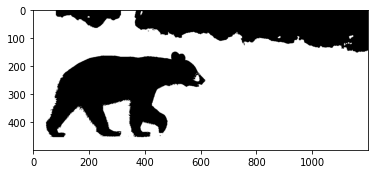

In [18]:
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step

# apply pyramid mean shift filtering
shifted = cv2.pyrMeanShiftFiltering(img, 21, 61)
plt.imshow(shifted)
cv2.imwrite('bear_shifted.jpg', shifted, [cv2.IMWRITE_JPEG_QUALITY,0])
gray_shifted = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)


#thresh = cv2.threshold(gray_shifted, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#plt.imshow(thresh, 'gray')
#cv2.imwrite('bear_thresh.jpg', thresh, [cv2.IMWRITE_JPEG_QUALITY,0])


#saliency = cv2.saliency.StaticSaliencyFineGrained_create()
#(success, saliencyMap) = saliency.computeSaliency(thresh)
#plt.imshow(saliencyMap, 'gray')

(500, 1200)


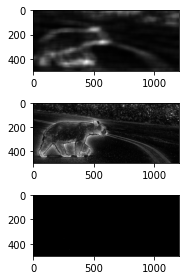

In [16]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(img)
saliencyMap = (saliencyMap * 255).astype("uint8")
#plt.imshow(saliencyMap, cmap = 'gray')
plt.subplot(311),plt.imshow(saliencyMap, 'gray')


# initialize OpenCV's static fine grained saliency detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(img)
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
print(saliencyMap.shape)
threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2.imwrite('threshMap.jpg', threshMap, [cv2.IMWRITE_JPEG_QUALITY,0])


plt.subplot(312),plt.imshow(saliencyMap, 'gray')
plt.subplot(313),plt.imshow(threshMap, 'gray')
plt.tight_layout()
plt.show()

In [ ]:

"""
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
print(labels)

#Watershed OpenCV
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(img, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(img, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.imshow(img)
#cv2.imshow("Output", img)
cv2.waitKey(0)
"""

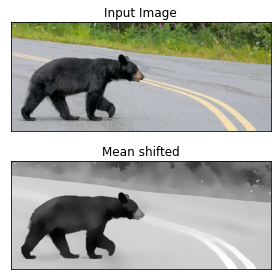

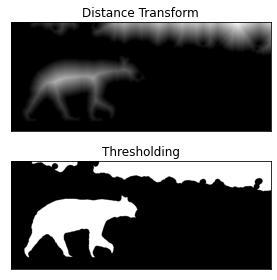

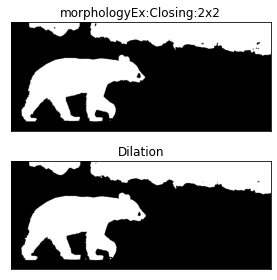

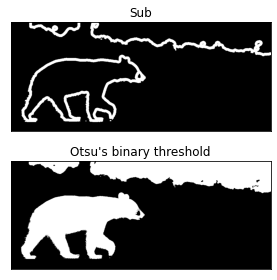

In [27]:


# SEGMENTATION
import numpy as np


b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


thresh = cv2.threshold(gray_shifted, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

#ret, thresh = cv2.threshold(gray_shifted,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold from dist_transform
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
sub = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
#ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
#markers = markers+1
# Now, mark the region of unknown with zero
#markers[unknown==255] = 0
#markers = cv2.watershed(img,markers)
#img[markers == -1] = [255,0,0]

cv2.imwrite('threshMap.jpg', threshMap, [cv2.IMWRITE_JPEG_QUALITY,0])


plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

#plt.imsave(r'thresh.png',thresh)
plt.subplot(212),plt.imshow(gray_shifted, 'gray')
plt.title("Mean shifted"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.subplot(211),plt.imshow(sub, 'gray')
plt.title("Sub"), plt.xticks([]), plt.yticks([])

#plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])



plt.subplot(212),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

NameError: ignored

# New Section

In [ ]:

import cv2
import numpy as np
from scipy.linalg.decomp import eig
from scipy import sparse
from scipy.sparse.linalg import eigs
 
class Ncut(object):
 
    def __init__(self, img):
        self.no_rows, self.no_cols, self.channel = img.shape
        self.N = self.no_rows * self.no_cols
        self.V_nodes = self.V_node_maker(img)
        self.X = self.X_maker()
        self.F = self.F_maker(img)
        # parameter for W clculate
        self.r = 2
        self.sigma_I = 4
        self.sigma_X = 6
        # Dense W,D
        self.W = self.W_maker()
        self.D = self.D_maker()
 
    # V_nodes shape : [self.N,1,3]
    def V_node_maker(self, img):
        b,g,r = cv2.split(img)
        b = b.flatten()
        g = g.flatten()
        r = r.flatten()
        V_nodes = np.vstack((b,g))
        V_nodes = np.vstack((V_nodes,r))
        return V_nodes
 
    def X_maker(self):
        X_temp = np.arange(self.N)
        X_temp = X_temp.reshape((self.no_rows,self.no_cols))
        X_temp_rows = X_temp // self.no_rows
        X_temp_cols = (X_temp // self.no_cols).T
        X = np.zeros((self.N, 1, 2))
        X[:,:,0] = X_temp_rows.reshape(self.N,1)
        X[:,:,1] = X_temp_cols.reshape(self.N,1)
        return X
 
    def F_maker(self,img):
        if self.channel < 2:
            return self.gray_feature_maker(img)
        else:
            return self.color_img_feature_maker(img)
 
    def gray_feature_maker(self,img):
        print('need to ')
 
    def color_img_feature_maker(self,img):
        F = img.flatten().reshape((self.N,1,self.channel))
        F = F.astype('uint8')
        return F
 
    def W_maker(self):
        X = self.X.repeat(self.N,axis = 1)
        X_T = self.X.reshape((1,self.N,2)).repeat(self.N,axis = 0)
        diff_X = X - X_T
        diff_X = diff_X[:,:,0]**2 + diff_X[:,:,1]**2
 
        F = self.F.repeat(self.N,axis = 1)
        F_T = self.F.reshape((1,self.N,3)).repeat(self.N,axis = 0)
        diff_F = F - F_T
        diff_F = diff_F[:,:,0]**2 + diff_F[:,:,1]**2 + diff_F[:,:,2]**2
 
        W_map = diff_X < self.r**2 # valid map for W
 
        W = np.exp(-((diff_F / (self.sigma_I**2)) + (diff_X / (self.sigma_X**2))))
 
        return W * W_map 
 
    def D_maker(self):
        # D is a diagonal matrix using di as diagonal, di is the sum of weight of node i with all other nodes
        d_i = np.sum(self.W, axis=1)
        D = np.diag(d_i)
        return D
 
    def EigenSolver(self):
        L = self.D - self.W
        R = self.D
        lam,y = eig(L, R)
        index = np.argsort(lam)
 
        top2 = lam[index[:2]].real
        smallest_2 = y[:,index[1]]
        print('dense eigenvector')
        return smallest_2.real
 
    def EigenSolver_sparse(self):
        s_D = sparse.csr_matrix(self.D)
        s_W = sparse.csr_matrix(self.W)
        s_D_nhalf = np.sqrt(s_D).power(-1)
        L = s_D_nhalf @ (s_D - s_W) @ s_D_nhalf
        lam,y = eigs(L)
        index = np.argsort(lam)
 
        top2 = lam[index[:2]].real
        smallest_2 = y[:, index[1]]
        print('sparse eigenvector')
        return smallest_2.real
 
 
if __name__ == '__main__':
    # This is dense eigenvector method
    # img = cv2.imread('picture/Ncut_test.png', cv2.IMREAD_COLOR)
    # cutter = Ncut(img)
    # eigenvector = cutter.EigenSolver()
 
    # the process is cost too much time, so I saved the results in a txt file, just ignore this part if you need't
    
    # file = open('result.txt','w')
    # for i in eigenvector:
    #     file.write(str(i))
    #     file.write(',')
    # file = open('result.txt', 'r')
    # a = file.read()
    # b = np.array(a.split(','))
 
    # This is sparse eigenvector method
    #img = cv2.imread('picture/Ncut_test.png', cv2.IMREAD_COLOR)
    cutter = Ncut(img)
    eigenvector = cutter.EigenSolver_sparse()
    b = eigenvector
    b = b.reshape((50,50)).astype('float64')
    b = (b/b.max())*255
    cv2.imshow('eigvec',b.astype('uint8'))
    cv2.waitKey()
    print('Finished!')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input data set
X = np.array([
    [-4, -3.5], [-3.5, -5], [-2.7, -4.5],
    [-2, -4.5], [-2.9, -2.9], [-0.4, -4.5],
    [-1.4, -2.5], [-1.6, -2], [-1.5, -1.3],
    [-0.5, -2.1], [-0.6, -1], [0, -1.6],
    [-2.8, -1], [-2.4, -0.6], [-3.5, 0],
    [-0.2, 4], [0.9, 1.8], [1, 2.2],
    [1.1, 2.8], [1.1, 3.4], [1, 4.5],
    [1.8, 0.3], [2.2, 1.3], [2.9, 0],
    [2.7, 1.2], [3, 3], [3.4, 2.8],
    [3, 5], [5.4, 1.2], [6.3, 2]
])


def mean_shift(data, radius=2.0):
    clusters = []
    for i in range(len(data)):
        cluster_centroid = data[i]
        cluster_frequency = np.zeros(len(data))

        # Search points in circle
        while True:
            temp_data = []
            for j in range(len(data)):
                v = data[j]
                # Handle points in the circles
                if np.linalg.norm(v - cluster_centroid) <= radius:
                    temp_data.append(v)
                    cluster_frequency[i] += 1

            # Update centroid
            old_centroid = cluster_centroid
            new_centroid = np.average(temp_data, axis=0)
            cluster_centroid = new_centroid
            # Find the mode
            if np.array_equal(new_centroid, old_centroid):
                break

        # Combined 'same' clusters
        has_same_cluster = False
        for cluster in clusters:
            if np.linalg.norm(cluster['centroid'] - cluster_centroid) <= radius:
                has_same_cluster = True
                cluster['frequency'] = cluster['frequency'] + cluster_frequency
                break

        if not has_same_cluster:
            clusters.append({
                'centroid': cluster_centroid,
                'frequency': cluster_frequency
            })

    print('clusters (', len(clusters), '): ', clusters)
    clustering(data, clusters)
    show_clusters(clusters, radius)


# Clustering data using frequency
def clustering(data, clusters):
    t = []
    for cluster in clusters:
        cluster['data'] = []
        t.append(cluster['frequency'])
    t = np.array(t)
    # Clustering
    for i in range(len(data)):
        column_frequency = t[:, i]
        cluster_index = np.where(column_frequency == np.max(column_frequency))[0][0]
        clusters[cluster_index]['data'].append(data[i])


# Plot clusters
def show_clusters(clusters, radius):
    colors = 10 * ['r', 'g', 'b', 'k', 'y']
    plt.figure(figsize=(5, 5))
    plt.xlim((-8, 8))
    plt.ylim((-8, 8))
    plt.scatter(X[:, 0], X[:, 1], s=20)
    theta = np.linspace(0, 2 * np.pi, 800)
    for i in range(len(clusters)):
        cluster = clusters[i]
        data = np.array(cluster['data'])
        plt.scatter(data[:, 0], data[:, 1], color=colors[i], s=20)
        centroid = cluster['centroid']
        plt.scatter(centroid[0], centroid[1], color=colors[i], marker='x', s=30)
        x, y = np.cos(theta) * radius + centroid[0], np.sin(theta) * radius + centroid[1]
        plt.plot(x, y, linewidth=1, color=colors[i])
    plt.show()


mean_shift(X, 2.5)